In [1]:
import numpy as np
from collections import  Counter
import matplotlib.pyplot as plt

In [2]:
# Función para calcular la distancia euclidiana
def euclidean_distance(point, centroid):
    return np.sqrt(np.sum((point - centroid)**2))

In [23]:
X_test = np.array([[2,2],[3,3]]) # No se puede usar la funcion len() con arrays
X_train = np.array([[2,3],[3,4],[5,5],[1,1]])
y_train = np.array([1,2,1,2])
def k_nearest_neighbors(X_train, y_train, X_test, k=3):
  #Lista para almacenar las clases asignadas
  y_pred = []
  X_test = np.array(X_test)

  #Iterar sobre cada punto de prueba
  for ind in range(X_test.shape[0]):
    #Calcular las distancias entre el punto de prueba y todos los puntos de entrenamiento.
    distancias = [euclidean_distance(X_test[ind], p_ent ) for p_ent in X_train ]
    
    #Seleccionar los K puntos más cercanos
    K_indices = np.argsort(distancias)[:k] 
    
    # Asignar la clase más frecuente entre los K vecinos más cercanos al punto de prueba
    k_nearest_classes = [y_train[idx] for idx in K_indices]
    
    #Seleccionamos la clase más comun. [(valor,numero_de_repeticiones)]
    most_common_clas = Counter(k_nearest_classes).most_common(1)
    #Asigamos a la clase más commun.
    y_pred.append(most_common_clas[0][0])
  return y_pred

k_nearest_neighbors(X_train, y_train, X_test,3)

[2, 1]

In [40]:
#Prueba
X_train = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
y_train = np.array([12, 12, 1, 1, 1, 1])
#Prueba2
X_space = np.array([[i, j] for i in np.linspace(-1, 11, 100) for j in np.linspace(-1, 11, 100)])
X_train = X_space[np.random.choice( X_space.shape[0],100, replace=False )]
y_train = np.array(np.random.randint(5,size=100))
#----------------------------------------------------------------
X_test = np.array([[2, 2], [7, 9], [0, 0], [10, 10]])

In [41]:
y_pred = k_nearest_neighbors(X_train, y_train, X_test, k=3)
y_pred

[1, 3, 3, 2]

In [42]:
y_train

array([2, 4, 0, 2, 0, 3, 4, 4, 2, 3, 0, 1, 2, 0, 2, 3, 0, 0, 1, 4, 1, 2,
       2, 0, 4, 3, 3, 3, 1, 2, 1, 2, 0, 1, 1, 0, 2, 3, 3, 1, 0, 1, 2, 3,
       4, 0, 1, 1, 4, 3, 1, 1, 1, 3, 0, 2, 2, 4, 4, 3, 1, 0, 3, 2, 1, 0,
       3, 1, 1, 0, 4, 3, 3, 2, 1, 0, 2, 3, 0, 4, 4, 2, 3, 0, 0, 4, 2, 2,
       2, 0, 3, 4, 1, 0, 3, 3, 4, 3, 1, 3])

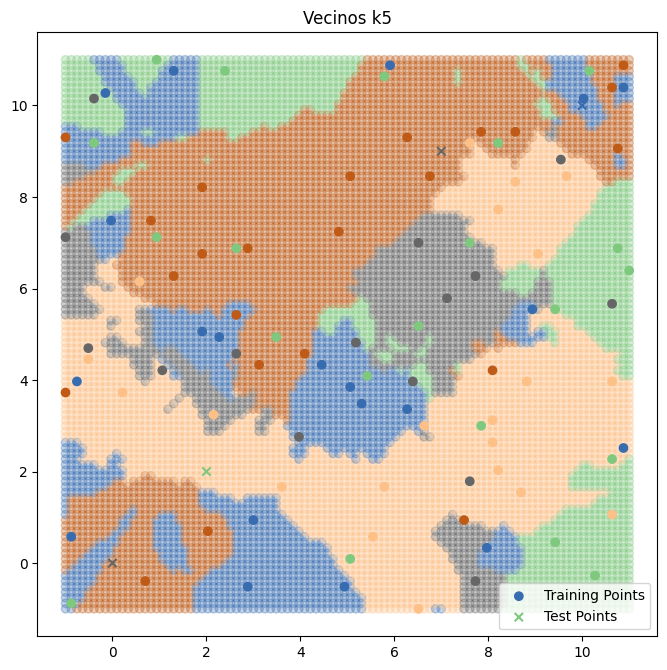

In [43]:
plt.figure(figsize=(8,8),dpi=100)
n_vec = 5
#Predecir clases para cada punto en X_space
y_space_pred = k_nearest_neighbors(X_train, y_train, X_space, k=n_vec)

# Graficar los puntos de X_space en diferentes colores según su clase asignada
plt.scatter(X_space[:, 0], X_space[:, 1], c=y_space_pred, cmap='Accent', alpha=.3)#label='Predicted Classes'

#Se predice el conjunto de prueba
y_test = k_nearest_neighbors(X_train, y_train, X_test, k=n_vec)

# Graficar los puntos de entrenamiento y los puntos de prueba en diferentes colores
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='Accent', label='Training Points')
#Conjunto de prueba
plt.scatter(X_test[:, 0], X_test[:, 1],marker='x', c=y_test,cmap='Accent', label='Test Points')
plt.title(f'Vecinos k{n_vec}')
plt.legend()
plt.show()